# **DSCI Final Project: Predicting Subscription to a Game-Related Newsletter**
**Author:** Madhur Singla  
**Date:** March 15, 2025  

---

## **1. Data Description**
The dataset consists of two CSV files:  
1. **`players.csv`** - Contains demographic and gameplay-related information about each player. (196 observations)
2. **`sessions.csv`** - Contains session logs, including timestamps for each play session. (1535 observatoins)

### **Players Dataset Overview**
The `players.csv` dataset includes:
- **experience**: The experience level of a player (`Pro`, `Veteran`, `Amateur`, etc.).
- **subscribe**: Binary variable (`True`/`False`) indicating if the player subscribed to the newsletter.
- **hashedEmail**: Unique hashed identifier for each player.
- **played_hours**: Total number of hours a player has spent in the game.
- **name**: The player's in-game name.
- **gender**: Player’s gender.
- **Age**: Player’s age.

### **Sessions Dataset Overview**
The `sessions.csv` dataset tracks player activities:
- **hashedEmail**: Used to match session data with player data.
- **start_time, end_time**: The timestamps marking session duration.
- **original_start_time, original_end_time**: Unix timestamps for the session.

### **Variable Summary Table (for easier redability and further details like type, etc)**
| Variable | Dataset | Type | Description |
|----------|---------|------|-------------|
| experience | players | Categorical | The player's experience level (e.g., Pro, Veteran, Amateur) |
| subscribe | players | Boolean | Whether the player subscribed to the newsletter (True/False) |
| hashedEmail | players/sessions | String | Unique identifier for each player (hashed) |
| played_hours | players | Numeric | Total number of hours a player has spent in the game |
| name | players | String | Player's in-game name |
| gender | players | Categorical | Player's gender |
| age | players | Numeric | Player's age |
| start_time | sessions | Timestamp | Session start time |
| end_time | sessions | Timestamp | Session end time |
| original_start_time | sessions | Unix Timestamp | Original session start time |
| original_end_time | sessions | Unix Timestamp | Original session end time |

### **Potential issues with data**

Potential issues with the data include missing values in experience, gender, or played_hours, requiring imputation; data integrity concerns with hashedEmail possibly having duplicates or mismatches; time formatting inconsistencies between standard and Unix timestamps; and volunteer bias, as data is collected from a research server with self-selected participants.

---

## **2. Research Question**
### **Broad Question:**
What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter?

### **Specific Question:**
Can we predict whether a player subscribes to the game-related newsletter using their experience level, age, gender, and total hours played?

### **How the Data Will Be Used:**
- The dataset includes `subscribe` as the **response variable**, which indicates whether a player subscribed.
- The following explanatory variables will be considered:
  - `experience`: The player’s experience level in the game.
  - `age`: The player’s age, which might impact engagement and subscription behavior.
  - `gender`: Whether there are observable trends based on gender.
  - `playTime`: The total hours a player has spent on the game, representing engagement.

### **Planned Data Wrangling:**
- **Handling Missing Values:** Identify and impute any missing values.
- **Categorical Encoding:** Convert categorical variables (`experience`, `gender`) into numerical form.
- **Feature Scaling:** Normalize numerical variables (`playTime`, `age`) for consistency in modeling.
- **Data Splitting:** Divide the dataset into training and testing sets.

The cleaned and processed dataset will then be used to train a classification model to answer the research question.

---

## **3. Exploratory Data Analysis (EDA)**
### **3.1 Checking for Missing Values and Data Types**

In [1]:
# Load necessary libraries
library(tidyverse)

# Read the datasets
players <- read.csv("players.csv")
sessions <- read.csv("sessions.csv")

# Check for missing values
colSums(is.na(players))
colSums(is.na(sessions))

# Check structure of datasets
str(players)
str(sessions)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2

hashedEmail          start_time            end_time original_start_time 
                  0                   0                   0                   0 
  original_end_time 
                  2

'data.frame':	196 obs. of  7 variables:
 $ experience  : chr  "Pro" "Veteran" "Veteran" "Amateur" ...
 $ subscribe   : logi  TRUE TRUE FALSE TRUE TRUE TRUE ...
 $ hashedEmail : chr  "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d" "f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9" "b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28" "23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5" ...
 $ played_hours: num  30.3 3.8 0 0.7 0.1 0 0 0 0.1 0 ...
 $ name        : chr  "Morgan" "Christian" "Blake" "Flora" ...
 $ gender      : chr  "Male" "Male" "Male" "Female" ...
 $ Age         : int  9 17 17 21 21 17 19 21 17 22 ...
'data.frame':	1535 obs. of  5 variables:
 $ hashedEmail        : chr  "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf" "36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686" "f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc" "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f

### **3.2 Summary Statistics**

In [2]:
# Summary of numerical columns
summary(players)

# Count of each experience level
table(players$experience)

# Count of gender distribution
table(players$gender)

# Count of subscribers vs. non-subscribers
table(players$subscribe)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
                                                                        
     name              gender               Age       
 Length:196         Length:196         Min.   : 8.00  
 Class :character   Class :character   1st Qu.:17.00  
 Mode  :character   Mode  :character   Median :19.00  
                                       Mean   :20.52  
                                       3rd Qu.:22.00  
                                       Max.   :50.00  
                               


 Amateur Beginner      Pro  Regular  Veteran 
      63       35       14       36       48 


          Agender            Female              Male        Non-binary 
                2                37               124                15 
            Other Prefer not to say      Two-Spirited 
                1                11                 6 


FALSE  TRUE 
   52   144 

### **3.3 Mean Values of Quantitative Variables**

In [3]:
# Compute mean of numeric columns
players |>
  summarise(across(where(is.numeric), mean, na.rm = TRUE))


Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `across(where(is.numeric), mean, na.rm = TRUE)`.
Caused by warning:
! The `...` argument of `across()` is deprecated as of dplyr 1.1.0.
Supply arguments directly to `.fns` through an anonymous function instead.

  # Previously
  across(a:b, mean, na.rm = TRUE)

  # Now
  across(a:b, \(x) mean(x, na.rm = TRUE))”


played_hours,Age
<dbl>,<dbl>
5.845918,20.52062


### **3.4 Visualizing the Data**

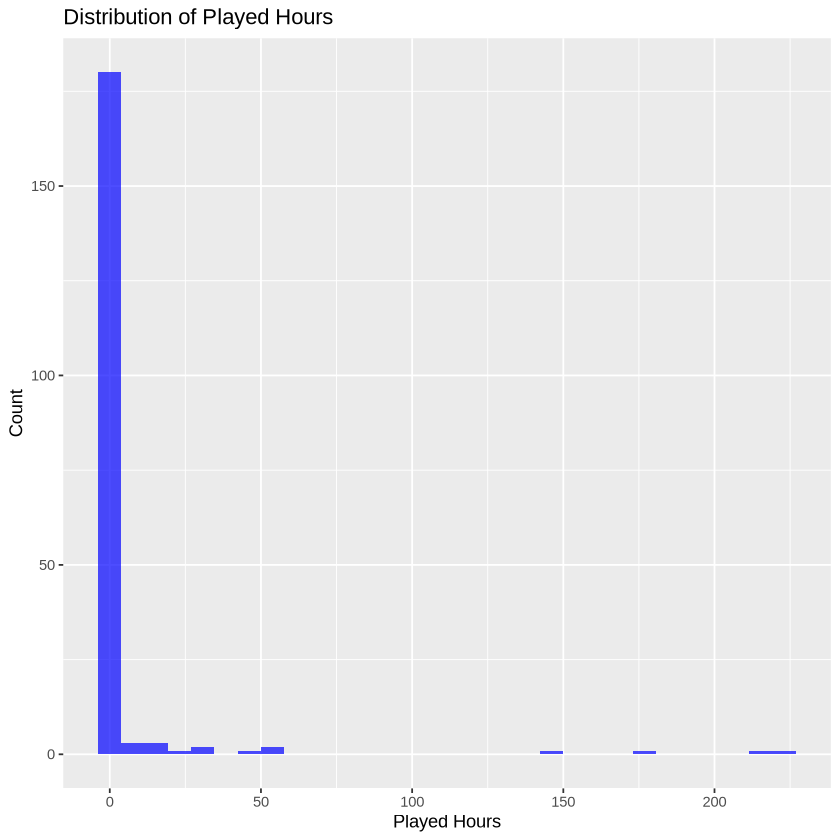

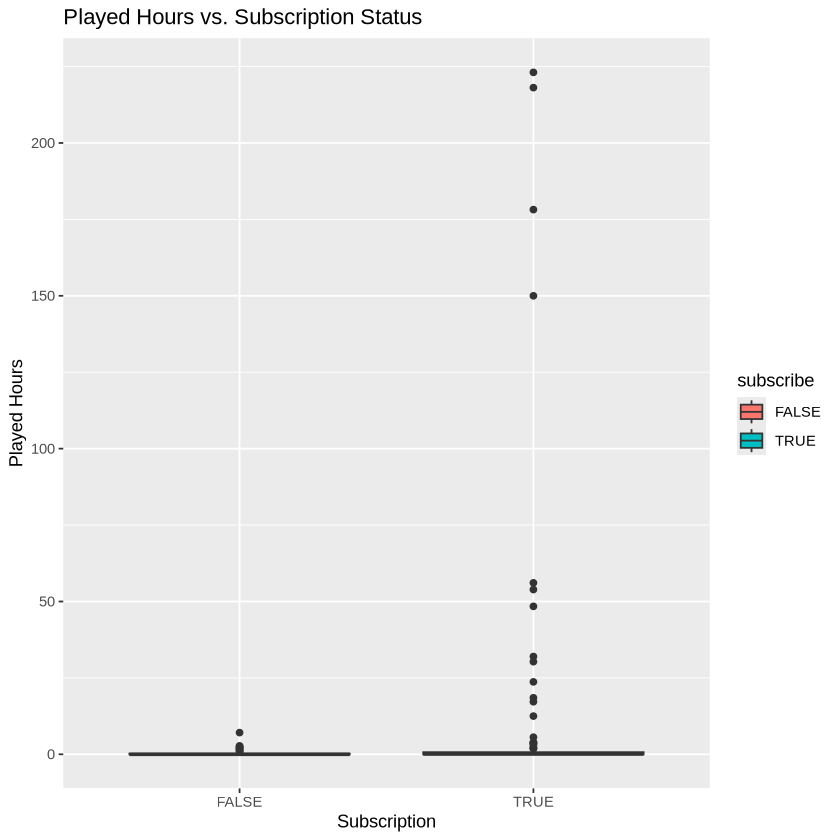

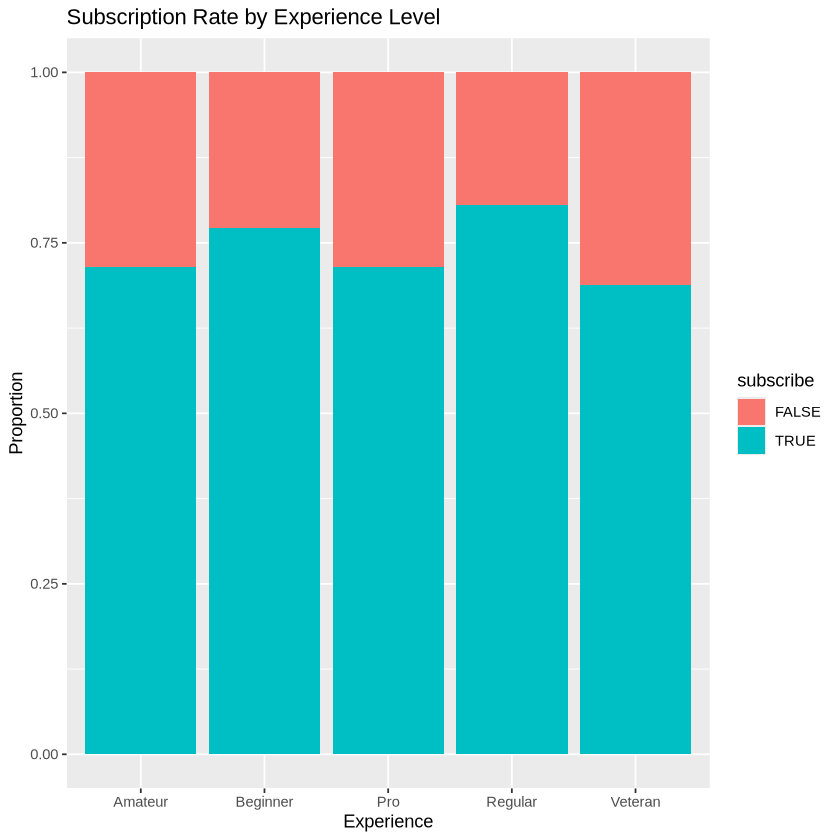

In [4]:
# Histogram of played hours
ggplot(players, aes(x = played_hours)) +
  geom_histogram(bins = 30, fill = "blue", alpha = 0.7) +
  labs(title = "Distribution of Played Hours", x = "Played Hours", y = "Count")

# Boxplot of played hours by subscription status
ggplot(players, aes(x = subscribe, y = played_hours, fill = subscribe)) +
  geom_boxplot() +
  labs(title = "Played Hours vs. Subscription Status", x = "Subscription", y = "Played Hours")

# Bar plot of experience level vs. subscription
ggplot(players, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(title = "Subscription Rate by Experience Level", x = "Experience", y = "Proportion")


- **Played Hours Histogram** → Most players have low playtime, but a few contribute significantly, creating a right-skewed distribution.  
- **Subscription by Experience Level** → More experienced players (**Pro, Veteran**) tend to subscribe more than **Amateurs**.  
- **Played Hours & Subscription (Boxplot)** → Subscribers generally have more played hours than non-subscribers, but there are exceptions.  
- **Overall** → Experience level and playtime seem to be key factors in predicting newsletter subscription.  


## **4. Methods and Plan**

To address our research question, we will use a **classification model** to predict whether a player subscribes to the game-related newsletter.

### **4.1 Proposed Method: K-Nearest Neighbors (K-NN) Classification**

The **K-Nearest Neighbors (K-NN)** algorithm is a non-parametric method used for classification tasks. It classifies a data point based on how its neighbors are classified.

#### **Why is this method appropriate?**

- **Simplicity and Intuition:** K-NN is easy to understand and implement, making it suitable for initial modeling.
- **No Assumptions About Data Distribution:** Unlike some models, K-NN doesn't assume an underlying distribution for the data, which is beneficial given the diverse player characteristics.

### **4.2 Assumptions**

- **Feature Scaling:** K-NN is sensitive to the scale of the data. Features should be standardized or normalized to ensure each contributes equally to the distance calculations.
- **Relevant Features:** The algorithm assumes that the selected features are relevant to the outcome and that similar players have similar subscription behaviors.

### **4.3 Potential Limitations**

- **Computational Intensity:** K-NN can be computationally expensive, especially with large datasets, as it stores all training data and computes distances for each prediction.
- **Choice of 'k':** The performance of K-NN heavily depends on the choice of 'k' (the number of neighbors). A small 'k' can be noisy, while a large 'k' might overlook local patterns.
- **Imbalanced Data:** If one class is more frequent, K-NN might be biased towards that class.

### **4.4 Model Selection and Comparison**

To evaluate and select the optimal model, we will:

- **Tune 'k' Value:** Use cross-validation to determine the best 'k' value that balances bias and variance.
- **Performance Metrics:** Assess model performance using accuracy, precision, recall, and the F1-score to understand both the correctness and reliability of our predictions.

### **4.5 Data Processing Plan**

1. **Preprocess Data:**
   - **Feature Scaling:** Standardize numerical features to have zero mean and unit variance.

2. **Data Splitting:**
   - **Training and Testing Sets:** Split the dataset into training (70%) and testing (30%) subsets to evaluate model performance on unseen data.

3. **Cross-Validation:**
   - **k-Fold Cross-Validation:** Implement 5-fold cross-validation on the training set to tune the 'k' parameter and prevent overfitting.

4. **Model Training:**
   - **Fit K-NN Model:** Train the K-NN classifier using the optimal 'k' determined from cross-validation.

5. **Model Evaluation:**
   - **Performance Assessment:** Evaluate the model on the testing set using the chosen performance metrics to ensure generalizability.


By following this plan, we aim to develop a robust K-NN classifier that accurately predicts newsletter subscriptions based on player characteristics, aligning with the methodologies taught in our course.
